    """
    Description:
    
    Parameters:
    
    Return:
    """
    
    have a read me in the repository

In [10]:
import gaussxw
import math
import pylab as py
import numpy as np
import romberg as rm

%matplotlib inline

In [13]:
def hermitePolynomial (nValue, xValue):
    """
    Description: Calculates the nth Hermite polynomial for the given n-value at the given x-value
    
    Parameters: nValue - the nth Hermite polynomial to be calculated
                xValue - the independant variable where the Hermite polynomial will be determined
    
    Return: The value of the nth Hermite polynomial at the given x-value
    """
    
    hermiteCur = 2 * xValue
    hermitePrev = 1
    
    if 0 == nValue:
        hermiteCur = hermitePrev
    
    elif 1 < nValue:
        for i in range (2, nValue):
            hermiteNext = 2 * xValue * hermiteCur - 2 * i * hermitePrev
            hermitePrev = hermiteCur
            hermiteCur = hermiteNext
    
    return hermiteCur

In [14]:
def quantumWaveFunc (nValue, xValue):
    """
    Description: Calculates the wavefunction of the nth energy level of the one-dimensional quantum harmonic oscillator
    
    Parameters: nValue - the energy level being calculated
                xValue - the independant variable where the wavefunction is being evaluated
    
    Return: The value of the wavefunction for the nth energy level evaluated at the given x-value
    """
    
    return math.exp (-xValue**2 / 2) / (math.sqrt (2**nValue * math.factorial (nValue) * math.sqrt (math.pi))) * hermitePolynomial (nValue, xValue)

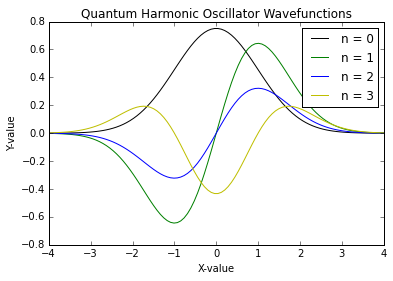

In [15]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Wavefunctions"

numberOfDataPoints = 100
nValues = [0, 1, 2, 3]
x1 = -4
x2 =  4

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([len (nValues), numberOfDataPoints])

for i in range (len (nValues)):
    for j in range (len (xValues)):
        yValues[i][j] = quantumWaveFunc (nValues[i], xValues[j])

py.plot (xValues, yValues[0], 'k-', label = "n = 0")
py.plot (xValues, yValues[1], 'g-', label = "n = 1")
py.plot (xValues, yValues[2], 'b-', label = "n = 2")
py.plot (xValues, yValues[3], 'y-', label = "n = 3")
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

C:\Users\workshop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


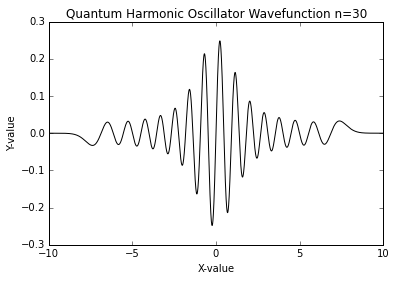

In [16]:
numberOfDataPoints = 10000

title = "Quantum Harmonic Oscillator Wavefunction n=30"

nValue = 30
x1 = -10
x2 =  10

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

In [17]:
def infIntTransformation (nValue, xValue):
    return quantumWaveFunc (nValue, math.tan (xValue)) / (math.cos (xValue))**2

def rootMeanFunc (nValue, xValue):
    return xValue**2 * (abs (infIntTransformation (nValue, xValue)))**2

In [18]:

numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5
integral = 0

x, w = gaussxw.gaussxw (numSamplePoints)

xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 - x1)
wp = 0.5 * (x2 - x1) * w

for i in range (numSamplePoints):
#    integral += w[i] * (rootMeanFunc (nValue, -(x[i]**2) / (1 - x[i])**2)) / (1 - x[i])**2
    integral += wp[i] * rootMeanFunc (nValue, x[i])

print (integral)
print (math.sqrt (integral))

0.195525576129
0.44218274065060625


C:\Users\workshop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


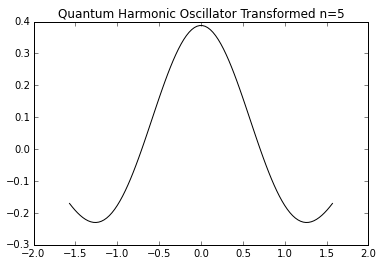

In [12]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Transformed n=5"

numberOfDataPoints = 100
nValue = 5
x1 = -math.pi / 2
x2 =  math.pi / 2

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
#py.xlabel (xLabel)
#py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

In [7]:
help (rm.romberg)

Help on function romberg in module romberg:

romberg(f, interval, tolerance, verbose=False, min_order=0, max_order=None, reference=None)
    Evaluate integral by Romberg integration.
    
    Note: The Romberg extrapolation order is taken 0-based in the code
    and diagnostic output.  That is, R(i,0) is the trapezoidal rule
    with 2**i steps.  (In Newman the extrapolation order is taken
    1-based, instead.)
    
    f: function to integrate
    interval: tuple integration region (a,b)
    tolerance: desired absolute error
    verbose (optional):  controls diagnostic output
    min_order (optional): lowest order to carry to, regardless of tolerance
    max_order (optional): limit on order of calculation, giving failure (or None)
    reference (optional): reference value for comparison output (or None)



In [ ]:
numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5
integral = 0



for i in range (numSamplePoints):
    

print (integral)
print (math.sqrt (integral))